## Importing Dependencies ##

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Load the California Housing Dataset ##

In [6]:
california = fetch_california_housing()

#Loading the dataset to a Pandas DataFrame
data = pd.DataFrame(california.data, columns = california.feature_names)
data['MedHouseValue'] = california.target

#visualize and understand data and format
print(data)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseValue  
0    

## Exploratory Analysis ##


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedHouseValue  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704       2.068558  
std       10.386050      2.135952      2.003532       1.153956  
min        0.692308     32.5

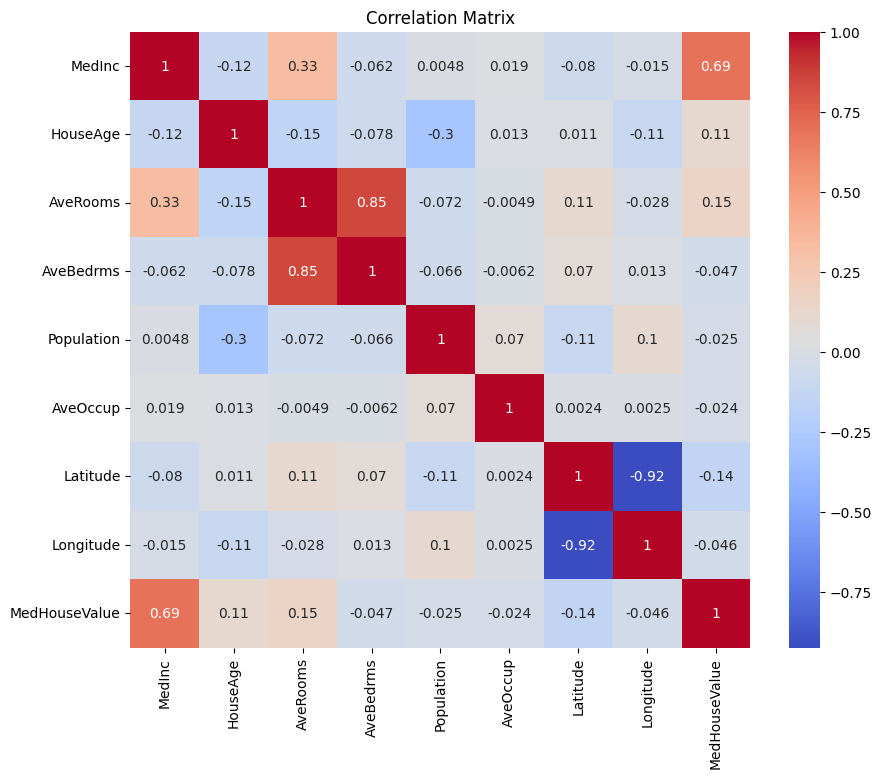

In [7]:
# Summary of Data
print(data.describe())

#Checking for null values
print(data.isnull().sum())

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Data Separation (Testing and Training Sets) ##

In [8]:
# Define features and target variable
X = data.drop('MedHouseValue', axis=1)
y = data['MedHouseValue']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Training ###

In [9]:
# Init and train linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict housing prices on the testing set
y_pred = model.predict(X_test_scaled)

## Model Evaluation ##

Mean Squared Error: 0.5558915986952442
R-squared: 0.575787706032451


<function matplotlib.pyplot.show(close=None, block=None)>

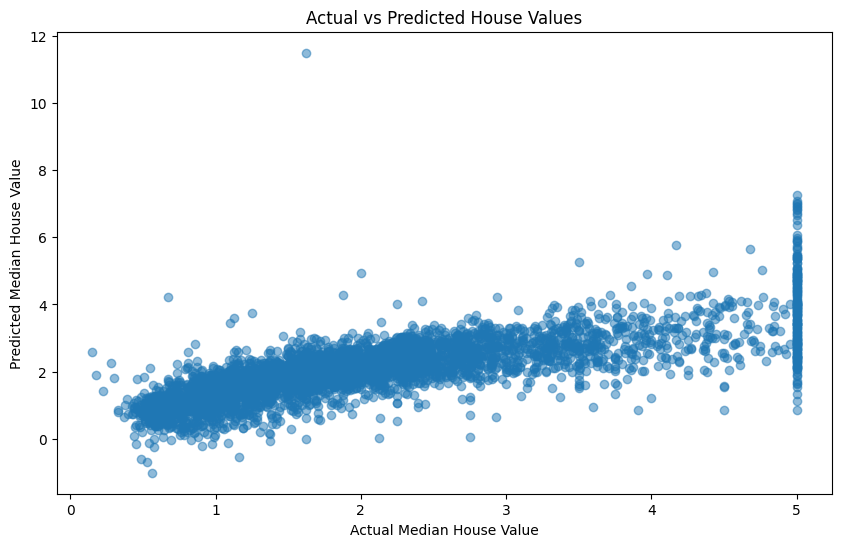

In [11]:
# Calculate mean squared error (MSE) and R squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Values')
plt.show


## Interpretation of Results ##


In [13]:
rmse = np.sqrt(0.5558915986952442)
print(rmse)

0.7455813830127763


The Root Mean Squared Error (RMSE) of 0.7455813830127763 suggests that on average, this model's predictions deviate from actual housing values by roughly $74,550.

The R² value of 0.575787706032451 explain about 57.58% of variance in house prices. However, this leaves roughly 42.42% variability uncaptured by the model.

With these findings in mind, I'll try to further improve the model using random forest regression.

Mean Squared Error (Random Forest): 0.255169737347244
R-squared (Random Forest): 0.8052747336256919


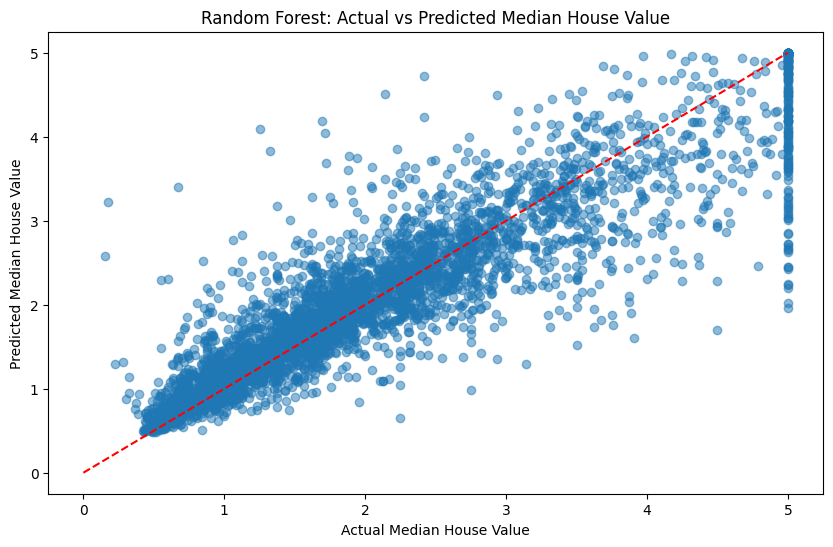

In [14]:
from sklearn.ensemble import RandomForestRegressor

#initialize Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

#Visualize the actual vs the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, 5], [0, 5], '--', color='red')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest: Actual vs Predicted Median House Value')
plt.show()

### Random Forest Regressor Model Interpretation ###

The Random Forest Regressor shows improved performance over the previous model. The Root Mean Squared Error (RMSE) is now approximately $50,510, a significant reduction from the previous $74,550, indicating more accurate predictions. The R² value has increased to 80.53%, meaning the model explains a substantial portion of the variance in house prices compared to 57.58% before. However, 19.47% of the variance remains unexplained, suggesting further potential for improvement.

On top of this, We could use Gradient Boosting Regressor (GBM) to predict the housing prices and see how that compares with the Random Forest Regressor.



Gradient Boosting - Mean Squared Error: 0.29399901242474274
Gradient Boosting - R-squared: 0.7756433164710084


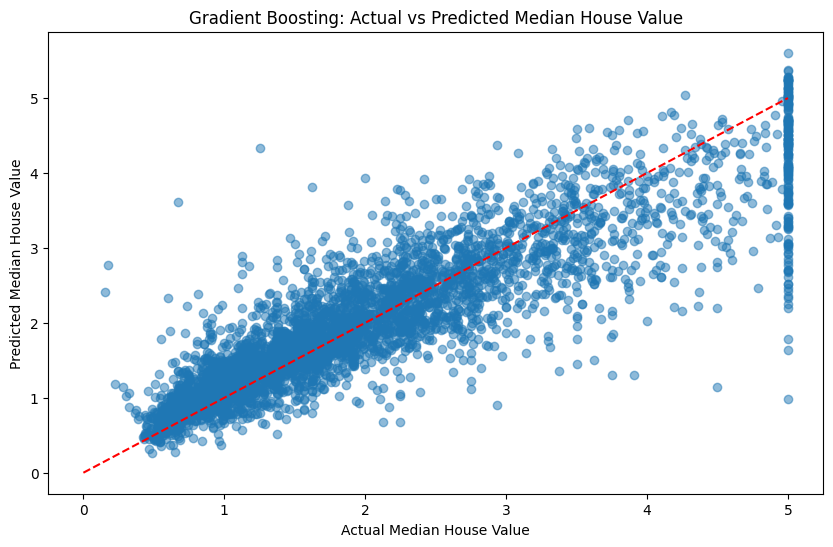

In [15]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the results
print(f"Gradient Boosting - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting - R-squared: {r2_gb}")

# Optional: Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([0, 5], [0, 5], '--', color='red')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Gradient Boosting: Actual vs Predicted Median House Value')
plt.show()


### Interpretations of Gradient Boosting Regressor Model ###

The Gradient Boosting Regressor shows improved performance when compared with the initial model with a Mean Squared Error (MSE) of 0.2940, meaning the model's predictions deviate from actual house prices by about $29,400 on average.

The R-squared (R²) value of 77.56% indicates that the model explains 77.56% of the variance in house prices, which is slightly lower than the 80.53% explained by the Random Forest model. Thus, while the Gradient Boosting model is quite effective, the Random Forest model has a slightly better ability to capture the variance in house prices.